# Introduction to Recurrent Neural Networks

The final neural network architecture we will cover is the recurrent neural network.

## What we will accomplish

In this notebook we will:
- Discuss the kinds of problems recurrent nets are designed for,
- Give an overview of basic RNN architectures,
- Demonstrate the weighted sum setup for such architectures and
- Build a RNN to predict IMDB review sentiment.

Let's go!

In [1]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
from seaborn import set_style

## This sets the plot style
## to have a grid on a white background
set_style("whitegrid")

## Sequential data

Similar to how convolutional neural networks were designed to deal with grid-based data, recurrent neural networks (RNN) were built to deal with sequential data. Some examples of sequential data include:
- Time series,
- Natural language,
- Music
- and More.

In sequential data it is often the case that the past impacts the future. For example, in text data preceding words may have an impact on our understanding of the current word.

## Simple RNN architecture

RNNs actually have a wide array of architectures depending upon the specific problem you are trying to solve. To demonstrate the general idea we will consider this simple architecture:

<img src="rnn1.png" width="40%"></img>

Here we have a RNN built to take in sequential data $(X^{(i)}, y^{(i)})$ four steps at a time, with four corresponding hidden layers. A use case of such an architecture would be an autofill predictor that takes in four words and then predicts what the next word will be. In this example, the $X^{(i)}$ and $y^{(i)}$ would be one-hot encoded vectors of length $d$, where $d$ is the size of the <i>lexicon</i>.

Each "step" of the architecture's sequence actually represents a unique feed forward network like so:

<img src="rnn2.png" width="50%"></img>

Where hidden layer $t+1$ also takes inputs from hidden layer $t$. In this way the final hidden layer takes input from all the previous hidden layers in a manner similar to a moving average model from our `Time Series` section.

### Weighted sum set up

The values for each hidden layer's nodes in this network are given by:

$$
h_1 = \Phi \left(W_{xh} X^{(1)}\right) \ \text{ and } \ h_t = \Phi \left( W_{xh}X^{(t)} + W_{hh} h_{t-1} \right),
$$

where $W_{xh}$ and $W_{hh}$ have the same entries regardless of the hidden layer considered, and the predicted value for each node of the output layers is given by:

$$
\hat{y^{(t)}} = \sigma\left( W_{hy} h_t \right),
$$

where the entries of $W_{hy}$ are the same regardless of $t$ and the nonlinear activation functions, $\Phi$ and $\sigma$ could be different or the same.

The dimensions of each $W_*$ weight matrix depend upon the dimensions of the $X^{(t)}$ and $y^{(t)}$ vectors and  the size of the hidden layer.

## Example: IMDB sentiment analysis

As an illustrative example we will use `keras` to build a sentiment classifier using IMDB movie reviews. Let's first load this data set.

In [2]:
## The data is stored in here
from keras.datasets import imdb

In [3]:
## This will determine the number of vocab words in our
## dictionary
max_features = 10000

## num_words tells keras to return the reviews so they contain only
## the num_words most used words across all the reviews
(X_train, y_train), (X_test,y_test) = imdb.load_data(num_words=max_features)

## Note you may receive a warning, this is not your fault, and is due to how
## keras is loading the data

In [4]:
## Let's look at the first training observation
print(X_train[0])
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


The data is stored as a list of indices, each of which is representative of a word. Let's see what this particular review looks like, once we have translated it from indices to words. Do not focus on the following code for now, as it is not important for building the neural network.

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key,value) in word_index.items()])

## The first training review, where words outside the top 1000 are replaced with
## ? marks
print(" ".join([reverse_word_index.get(i-3, '?') for i in X_train[0]]))
print()
print("sentiment value =", y_train[0])

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

The review above had a $y$ value of $1$, meaning that it has positive sentiment. A value of $0$ indicates a negative sentiment.

### Our network architecture

The RNN architecture we will use for this problem is pictured below:

<img src="rnn3.png" width="60%"></img>

where $s$ denotes the length of the sequence we will consider.

In this problem we have a single output at the end of the sequence because we are only predicting whether the entire sequence represents a positive or negative review. This example demonstrates how different sequential prediction tasks can correspond to slightly different network architectures.

Let's now turn our data into sequences and then build our RNN.

In [6]:
## Import pad_sequences
## May need to check keras.preprocessing.sequences if you are using older keras
from keras.utils import pad_sequences

In [7]:
print("The shape of our Xs prior to becoming sequences")
print("X_train:", np.shape(X_train))
print("X_test:", np.shape(X_test))

The shape of our Xs prior to becoming sequences
X_train: (25000,)
X_test: (25000,)


In [14]:
## In order to fit a neural net to these observations
## we need all of our reviews to be sequences of the same length
## We'll set a fixed length of 100 words. For those shorter than 100
## words we'll add padding. For those longer than 100 words, we'll cut off the
## excess
## keras does this for us :)
max_length = 100

## pad_sequences(data, maxlen)
X_train_seq = pad_sequences(X_train, max_length)
X_test_seq = pad_sequences(X_test, max_length)

In [15]:
print("The shape of our Xs after becoming sequences")
print("X_train:", np.shape(X_train_seq))
print("X_test:", np.shape(X_test_seq))

The shape of our Xs after becoming sequences
X_train: (25000, 100)
X_test: (25000, 100)


In [16]:
## Note the padding at the beginning 
X_train_seq[100,:]

array([6728,    5, 1960,  279,   13,   92,  124,  803,   52,   21,  279,
         14,    9,   43,    6,  762,    7,  595,   15,   16,    2,   23,
          4, 1071,  467,    4,  403,    7,  628, 2219,    8,   97,    6,
        171, 3596,   99,  387,   72,   97,   12,  788,   15,   13,  161,
        459,   44,    4, 3939, 1101,  173,   21,   69,    8,  401,    2,
          4,  481,   88,   61, 4731,  238,   28,   32,   11,   32,   14,
          9,    6,  545, 1332,  766,    5,  203,   73,   28,   43,   77,
        317,   11,    4,    2,  953,  270,   17,    6, 3616,   13,  545,
        386,   25,   92, 1142,  129,  278,   23,   14,  241,   46,    7,
        158], dtype=int32)

In [17]:
## Making our validation set
from sklearn.model_selection import train_test_split

X_train_train,X_val,y_train_train,y_val = train_test_split(X_train_seq, y_train,
                                                           test_size=.2,
                                                           shuffle=True,
                                                           stratify = y_train,
                                                           random_state=440)

### Making the Network

This network will introduce two new layer types `Embedding` and `SimpleRNN`. 

For now all you will need to know about the `Embedding` layer is that it takes in the sequences we just generated and turns them into a vector representation of the sequence that is more useful to the network. One way to think of this is the `Embedding` layer is similar to running the data through a PCA type step prior to fitting the network. The exact details are slightly beyond the scope of our boot camp and better suited for a natural language processing course, here are the docs on the `Embedding` layer, <a href="https://keras.io/api/layers/core_layers/embedding/">https://keras.io/api/layers/core_layers/embedding/</a>. <i>Note: the `Embedding` layer is specific to NLP tasks, and not used if you are building a RNN on time series data. This is a preprocessing step.</i>

The `SimpleRNN` layer is the akin to the RNN architecture we described above. Here are the docs <a href="https://keras.io/api/layers/recurrent_layers/simple_rnn/">https://keras.io/api/layers/recurrent_layers/simple_rnn/</a>.

In [18]:
## Import all the keras stuff we'll need
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics

###### 1. Make the model object

In [19]:
model = models.Sequential()

##### 2. Add the layers we want

In [20]:
## Embedding is added first
## the size of our dictionary is the first input, max_features
## followed by the desired embedding size, I chose 32, again for no particular reason
model.add(layers.Embedding(max_features, 32))

## Then the SimpleRNN layer
## the first input should be the same size as the input layer, i.e. 32
## return_sequences determines if the network should return the hidden state value for 
## each hidden layer h1, h2, ..., hT
## Since we only want the last one, hT, we set it equal to False
## If we were building a network with multiple SimpleRNN layers,
## you'd set this to True
model.add(layers.SimpleRNN(32, return_sequences=False))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [22]:
## Finally we'll add a Dense Layer for classification
## purposes
model.add(layers.Dense(1, activation='sigmoid'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


##### 3. Compile the model

Again we need to compile the model

In [24]:
## notice we use binary_crossentropy here
## this is because our sentiment problem is a binary
## classification problem
model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

##### 4. Fit the model

In [25]:
epochs = 10

history = model.fit(X_train_train, y_train_train,
                    epochs = epochs,
                    batch_size=128,
                    validation_data=(X_val,y_val))

## Note training this model can take a while

Epoch 1/10


2023-04-20 13:02:45.447556: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


157/157 [==============================] - 2s 13ms/step - loss: 0.6231 - accuracy: 0.6420 - val_loss: 0.5337 - val_accuracy: 0.7304
Epoch 2/10
157/157 [==============================] - 2s 13ms/step - loss: 0.4040 - accuracy: 0.8267 - val_loss: 0.5724 - val_accuracy: 0.7370
Epoch 3/10
157/157 [==============================] - 2s 13ms/step - loss: 0.3069 - accuracy: 0.8759 - val_loss: 0.3761 - val_accuracy: 0.8366
Epoch 4/10
157/157 [==============================] - 2s 13ms/step - loss: 0.2347 - accuracy: 0.9104 - val_loss: 0.4136 - val_accuracy: 0.8268
Epoch 5/10
157/157 [==============================] - 2s 13ms/step - loss: 0.1699 - accuracy: 0.9384 - val_loss: 0.5437 - val_accuracy: 0.7606
Epoch 6/10
157/157 [==============================] - 2s 12ms/step - loss: 0.1175 - accuracy: 0.9599 - val_loss: 0.5277 - val_accuracy: 0.8138
Epoch 7/10
157/157 [==============================] - 2s 12ms/step - loss: 0.0712 - accuracy: 0.9783 - val_loss: 0.5486 - val_accuracy: 0.8252
Epoch 8/10

In [26]:
history_dict = history.history

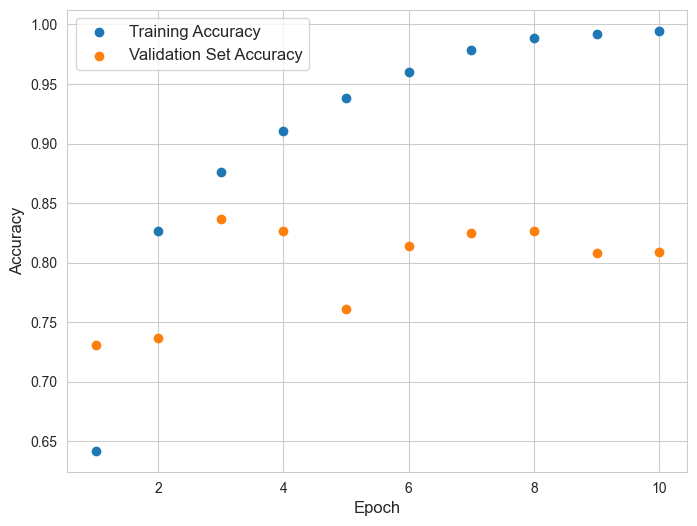

In [27]:
## Plotting the training and validation accuracy
plt.figure(figsize = (8,6))

plt.scatter(range(1,epochs+1), history_dict['accuracy'], label = "Training Accuracy")
plt.scatter(range(1,epochs+1), history_dict['val_accuracy'], label = "Validation Set Accuracy")

plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.legend(fontsize=12)

plt.show()

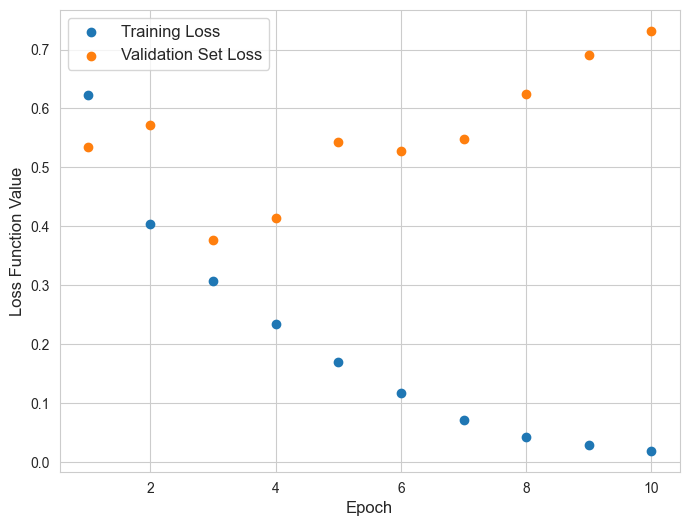

In [28]:
## Plotting the training and validation loss
plt.figure(figsize = (8,6))

plt.scatter(range(1,epochs+1), history_dict['loss'], label = "Training Loss")
plt.scatter(range(1,epochs+1), history_dict['val_loss'], label = "Validation Set Loss")

plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss Function Value", fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.legend(fontsize=12)

plt.show()

## Next steps

RNNs can be used for a variety of sequential data problems that we do not have time to cover in depth.

Moreover, `SimpleRNN` is actually a seldom used RNN layer type because there are more complicated `keras` layers that tend to outperform `SimpleRNN`. 

For those interested in learning more about RNN here are two references I leaned on heavily in making this notebook:
- <a href="http://faculty.neu.edu.cn/yury/AAI/Textbook/Deep%20Learning%20with%20Python.pdf">Deep Learning with Python</a>, which is a practical guide on how to implement neural networks with `keras`. RNNs start in chapter 6.
- <a href="https://link.springer.com/book/10.1007/978-3-319-94463-0">Neural Networks and Deep Learning</a>, which is a textbook that builds up the theory of neural networks. Recurrent neural networks start in chapter 7.

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2023.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)